# Stroke Prediction
According to the World Health Organization (WHO) strokes are the second leading cause of death around the world. In this notebook I will attempt to predict whether a patient is likely to get a stroke based on a myriad of factors

## Features
- id: unique identifier
- gender: "Male", "Female", "Other"
- age: patients age
- hypertension: 0 for no, 1 for yes
- heart_disease: 0 for no, 1 for yes
- ever_married: "No", "Yes"
- work_type: "Children", "Govt_job", "Never_Worked", "Private", "Self-Employed"
- residence type: "Rural", "Urban"
- Avg_glucose_level: Average glucose level in blood
- BMI: Patients Body Mass Index
- smoking_status: "formerly smoked", "never smoked", "smokes", "unknown"
- stroke: 0 for no, 1 for yes

It is important to note that for smoking_status of "unknown" there was no information collected on the patient

### Getting Ready

In [1]:
# Import necessary libraries for data analysis
import pandas as pd # Data Importing and Wrangling
import numpy as np # Linear Algebra and Transformations
import seaborn as sns # Data Visualization
import matplotlib.pyplot as plt # Data Visualization
import os # Data Importing and Wrangling
print('Libraries Imported!')

Libraries Imported!


In [2]:
# Get data set path
print('My path is', os.getcwd())

My path is C:\Users\mille\Python Projects\Stroke Prediction


In [3]:
# Import the data set
df = pd.read_csv('C:/Users/mille/Python Projects/Stroke Prediction/Stroke Data.csv')
print('Data Set Imported!')

Data Set Imported!


In [4]:
# View the shape of the data set
df.shape

(5110, 12)

In [5]:
# View the first 5 rows of the data set
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
# Check for any missing values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

The data set consists of 5100 different entries with 201 entries missing from the BMI feature

In [7]:
# Drop the missing values
df = df.dropna()

# Check to make sure values were dropped
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
# Check the feature types
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [9]:
# View the first five rows of the data set
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


### Data Analysis of Numerical Features
In this section I will take a look at some of the numerical features in the data set including age, average glucose level and bmi

In [10]:
# Create a data frame consisting of only numerical features
df_num = df[['age','avg_glucose_level','bmi']]

# View the measures of central tendency (Descriptive Statistics) for the new data frame
df_num.describe().round(2)

,age,avg_glucose_level,bmi
count,4909.00,4909.00,4909.00
mean,42.87,105.31,28.89
std,22.56,44.42,7.85
min,0.08,55.12,10.30
25%,25.00,77.07,23.50
50%,44.00,91.68,28.10
75%,60.00,113.57,33.10
max,82.00,271.74,97.60


The descriptive statistics tells us that the average age is about 43, the average glucose level in a patients blood is 105.31 and the average patients bmi is 28.89%, each with a standard deviation of 22.56, 44.42, and 7.85 respectively

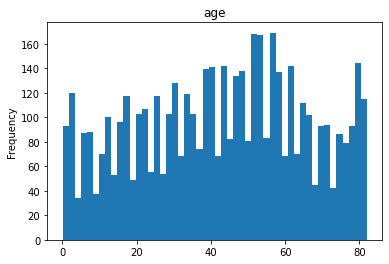

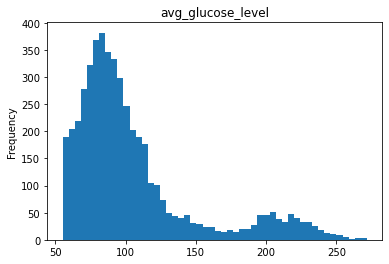

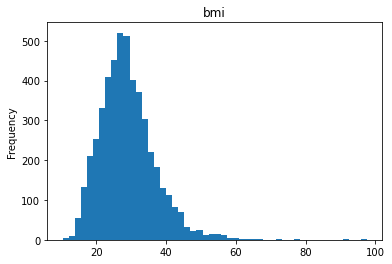

In [11]:
# Visualize the data inside the numerical features data frame
for n in df_num:
    df[n].plot(kind = 'hist', bins  = 50)
    plt.title(n)
    plt.show()

The graphical visualizations of the numerical features shows us that the distributions of both bmi and average glucose level are approximately right skewed, whereas the distribution of age is very slightly left skewed. 

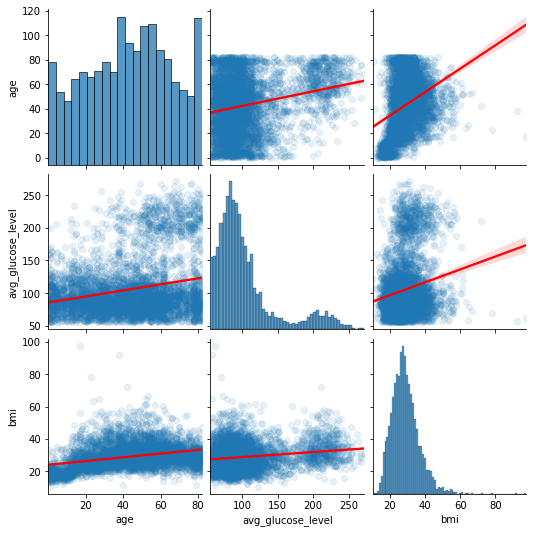

In [12]:
# Further visualize the numerical features
sns.pairplot(df_num, kind = 'reg', plot_kws = {'line_kws':{'color':'red'}, 'scatter_kws':{'alpha':0.1}})
plt.show()

The above pairwise plot gives a few insights into the numerical features. There seems to be some sort of relationship regarding age and bmi, as well as a relationship between the average glucose level and bmi. 

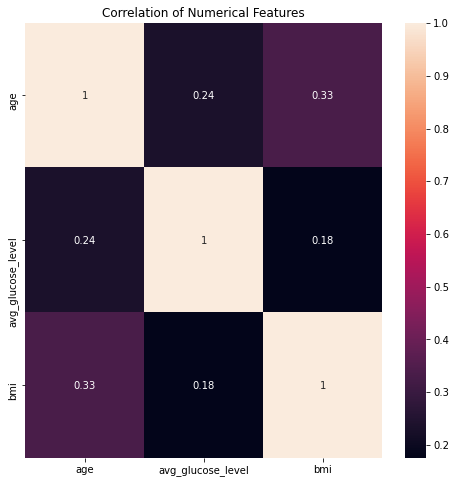

In [13]:
# Create a variable for the correlation of numerical features
corr = df_num.corr()

# Display a heat map of the correlation of the numerical features
fig  = plt.subplots(figsize = (8,8))
ax = sns.heatmap(corr, annot  = True)
ax.set(title = 'Correlation of Numerical Features')
plt.show()

Fromt the heat map of numerical features correlation, we can see that age has an impact on BMI where as the average glucose level doesn't affect bmi too much. The average glucose level also seems to have an impact on age. 

### Data Analysis of Categorical Features
In this section I will look at the remaining features of the data set. Features such as gender, hypertension, heart disease, marital status, type of work, type of residence, and smoking status will be analyzed.

In [14]:
# Create a data frame with only the categorical features
df_cat = df[['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']]

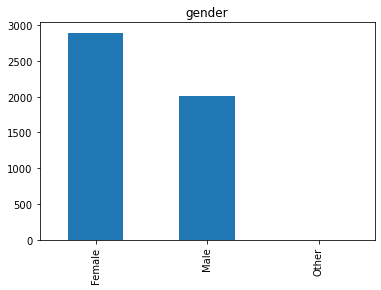

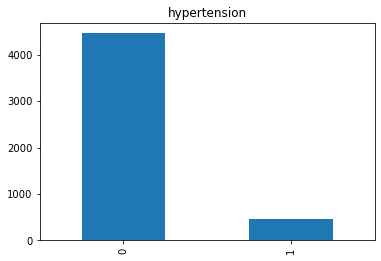

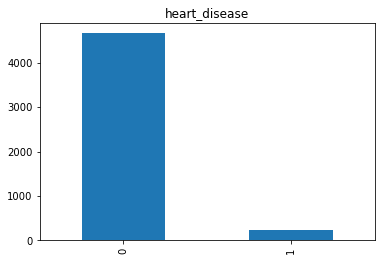

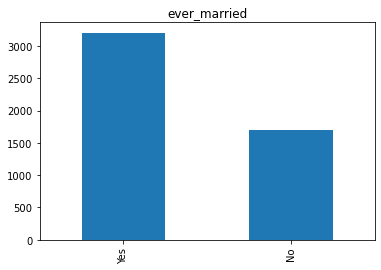

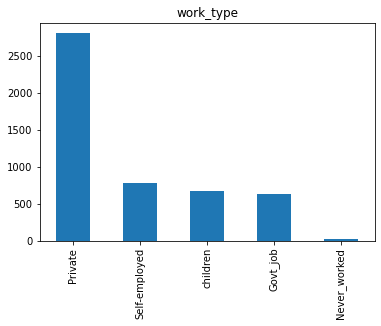

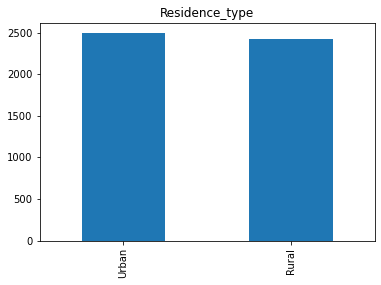

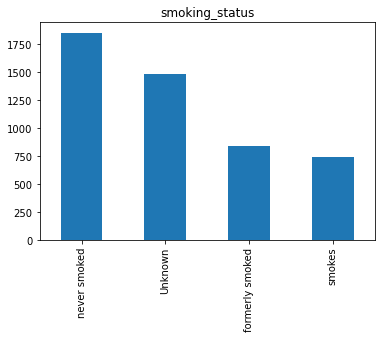

In [15]:
# Visualize the distribution of the data in the categorical features data frame
for n in df_cat:
    df[n].value_counts().plot(kind = 'bar')
    plt.title(n)
    plt.show()

#### Counts Between Categorical Features and Biological Sex

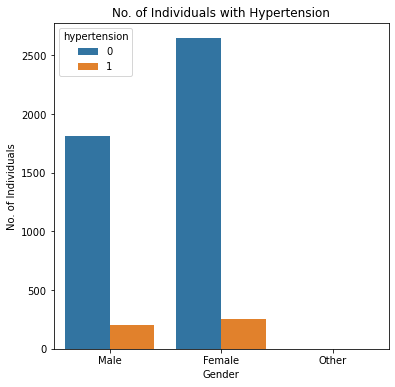

In [16]:
# Visualize biological sex with hypertension
fig = plt.subplots(figsize = (6,6))
ax = sns.countplot(data = df_cat, x = 'gender', hue = 'hypertension')
ax.set(xlabel = 'Gender', ylabel = 'No. of Individuals', title = 'No. of Individuals with Hypertension')
plt.show()

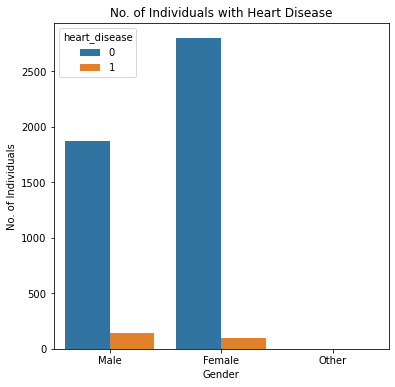

In [17]:
# Visualize biological sex with heart disease
fig = plt.subplots(figsize = (6,6))
ax = sns.countplot(data = df_cat, x = 'gender', hue = 'heart_disease')
ax.set(xlabel = 'Gender', ylabel = 'No. of Individuals', title = 'No. of Individuals with Heart Disease')
plt.show()

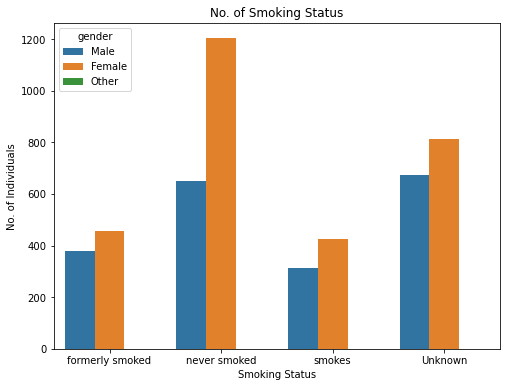

In [18]:
# Visualize biological sex with smoking status
fig = plt.subplots(figsize = (8,6))
ax = sns.countplot(data = df_cat, x = 'smoking_status', hue = 'gender')
ax.set(xlabel = 'Smoking Status', ylabel = 'No. of Individuals', title = 'No. of Smoking Status')
plt.show()

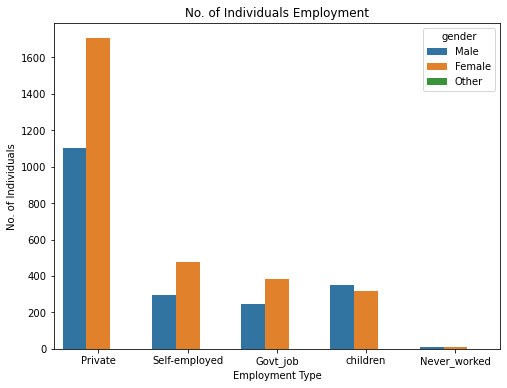

In [19]:
# Visualize biological sex with employment type
fig = plt.subplots(figsize = (8,6))
ax = sns.countplot(data = df_cat, x = 'work_type', hue = 'gender')
ax.set(xlabel = 'Employment Type', ylabel = 'No. of Individuals', title = 'No. of Individuals Employment')
plt.show()

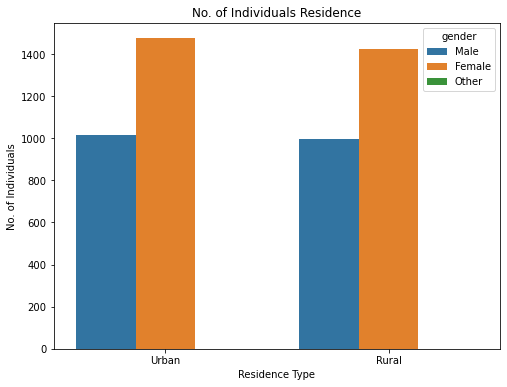

In [20]:
# Visualize biological sex with residence type
fig = plt.subplots(figsize = (8,6))
ax = sns.countplot(data = df_cat, x = 'Residence_type', hue = 'gender')
ax.set(xlabel = 'Residence Type', ylabel = 'No. of Individuals', title = 'No. of Individuals Residence')
plt.show()

In terms of biological sex it appears that both urban and rural environments are evenly distributed. There are more females working in the private sector. More females have never smoked than males. There are slightly more males who have had heart disease than females. There are slightly more females with hypertension than males. 

#### Counts Between Categorical Features and Smoking Status

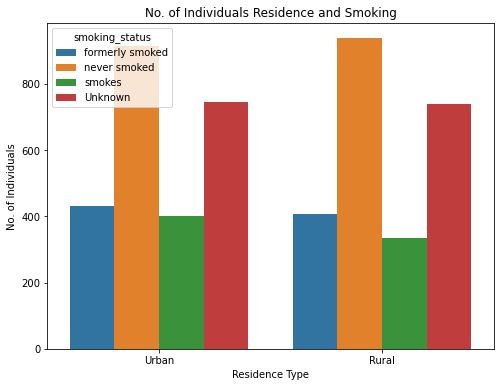

In [21]:
# Visualize smoking status with residence type
fig = plt.subplots(figsize = (8,6))
ax = sns.countplot(data = df_cat, x = 'Residence_type', hue = 'smoking_status')
ax.set(xlabel = 'Residence Type', ylabel = 'No. of Individuals', title = 'No. of Individuals Residence and Smoking')
plt.show()

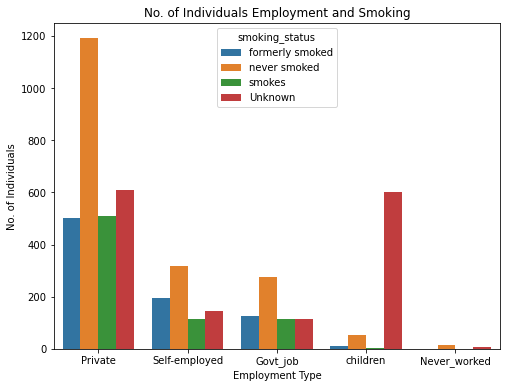

In [22]:
# Visualize smoking status with employment type
fig = plt.subplots(figsize = (8,6))
ax = sns.countplot(data = df_cat, x = 'work_type', hue = 'smoking_status')
ax.set(xlabel = 'Employment Type', ylabel = 'No. of Individuals', title = 'No. of Individuals Employment and Smoking')
plt.show()

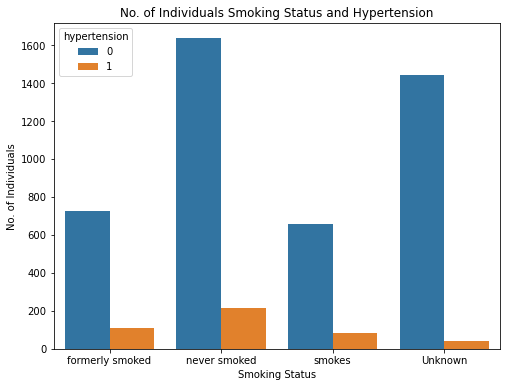

In [23]:
# Visualize hypertension with smoking status
fig = plt.subplots(figsize = (8,6))
ax = sns.countplot(data = df_cat, x = 'smoking_status', hue = 'hypertension')
ax.set(xlabel = 'Smoking Status', ylabel = 'No. of Individuals', title = 'No. of Individuals Smoking Status and Hypertension')
plt.show()

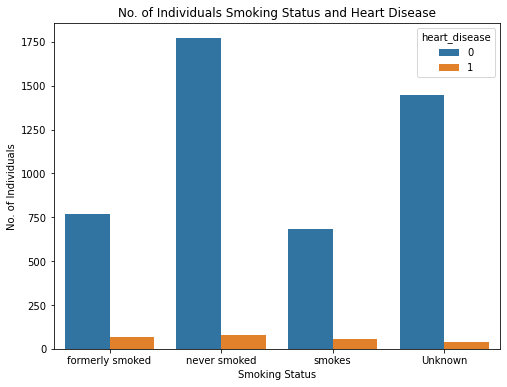

In [24]:
# Visualize heart disease with smoking status
fig = plt.subplots(figsize = (8,6))
ax = sns.countplot(data = df_cat, x = 'smoking_status', hue = 'heart_disease')
ax.set(xlabel = 'Smoking Status', ylabel = 'No. of Individuals', title = 'No. of Individuals Smoking Status and Heart Disease')
plt.show()

From the above graphs it appears that there are much more individuals who have never smoked that don't have heart disease. However, the number of those who have never smoked that have hypertension is larger. There is a disproportionate amount of individuals who work in the private sector that have never smoked. Slightly more individuals smoke in an urban environment than in a rural community. 

#### Counts Between Categorical Features and Employment Type

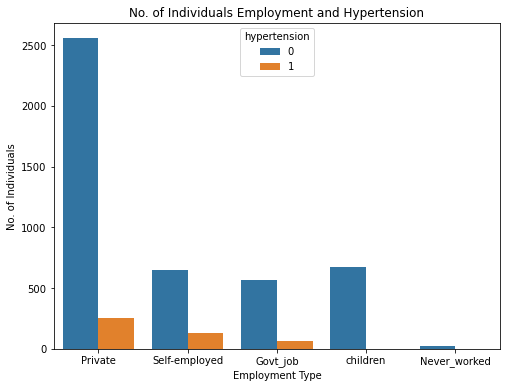

In [25]:
# Visualize hypertension with employment type
fig = plt.subplots(figsize = (8,6))
ax = sns.countplot(data = df_cat, x = 'work_type', hue = 'hypertension')
ax.set(xlabel = 'Employment Type', ylabel = 'No. of Individuals', title = 'No. of Individuals Employment and Hypertension')
plt.show()

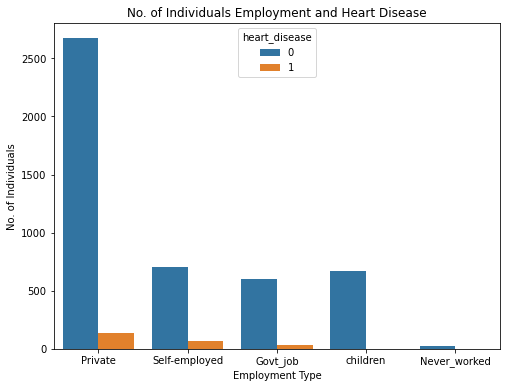

In [26]:
# Visualize heart disease with employment type
fig = plt.subplots(figsize = (8,6))
ax = sns.countplot(data = df_cat, x = 'work_type', hue = 'heart_disease')
ax.set(xlabel = 'Employment Type', ylabel = 'No. of Individuals', title = 'No. of Individuals Employment and Heart Disease')
plt.show()

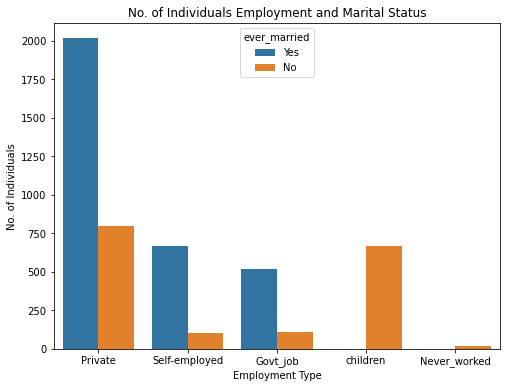

In [27]:
# Visualize marital status with employment type
fig = plt.subplots(figsize = (8,6))
ax = sns.countplot(data = df_cat, x = 'work_type', hue = 'ever_married')
ax.set(xlabel = 'Employment Type', ylabel = 'No. of Individuals', title = 'No. of Individuals Employment and Marital Status')
plt.show()

From the above analysis we can see that individuals who work in the private sector are often married. There's not that many individuals who have heart disease or hypertension who work in the private sector.

### Setting the Target Feature (Stroke) 
This section will create a variable for the prediction feature of whether or not a patient had a stroke. 

In [28]:
# Create target variable
target = df['stroke']

# Drop target variable from original data set
df = df.drop('stroke', axis = 1)

In [29]:
# View the edited data set
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked


### Data Preprocessing 

In [30]:
# Create dummy features
gender = pd.get_dummies(df['gender'])
married = pd.get_dummies(df['ever_married'], drop_first = True)
work = pd.get_dummies(df['work_type'])
residence = pd.get_dummies(df['Residence_type'], drop_first = True)
smoke = pd.get_dummies(df['smoking_status'], drop_first = True)

# Create new data frame from dummies
full = df.join([gender,married,work,residence,smoke])

# View new data frame
full.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,Yes,Govt_job,Never_worked,Private,Self-employed,children,Urban,formerly smoked,never smoked,smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,...,1,0,0,1,0,0,1,1,0,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,...,1,0,0,1,0,0,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,...,1,0,0,1,0,0,1,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,...,1,0,0,0,1,0,0,0,1,0
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,...,1,0,0,1,0,0,1,1,0,0


In [31]:
# Clean the new data set
clean = full[['age', 'hypertension','heart_disease','avg_glucose_level','bmi','Male','Female','Yes','Govt_job',
              'Never_worked','Private','Self-employed', 'children', 'Urban', 'formerly smoked', 'never smoked', 'smokes']]

# View the clean
clean.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,Male,Female,Yes,Govt_job,Never_worked,Private,Self-employed,children,Urban,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,1,0,0,1,1,0,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,0,1,1,0,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,0,1,1,0,0,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,0,1,0,0,1,0,0,1,1,0,0


### Model Building and Predictions

In [32]:
# Import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
print('Libraries Imported!')

Libraries Imported!


In [33]:
# Split the data set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(clean, target, test_size = 0.3)

#### Random Forest Classifier

In [34]:
# Create the classifier and fit the data
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Create variable for predictors
rfc_pre = rfc.predict(X_test)

# Create data frame with actual values and predicted values
predictions = pd.DataFrame(index = y_test.index)
predictions['actual'] = y_test

# Add rfc X_test to predictions
predictions['rfc'] = rfc_pre

In [35]:
# View the classification report
print(classification_report(y_test, rfc_pre))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1417
           1       0.00      0.00      0.00        56

    accuracy                           0.96      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.93      0.96      0.94      1473



C:\Users\mille\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


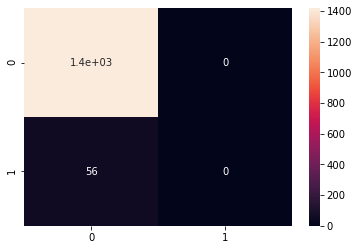

In [36]:
# Visualize a confusion matrix for the rfc
cm = pd.DataFrame(confusion_matrix(y_test,rfc_pre))
sns.heatmap(cm, annot = True)
plt.show()

When using the random forest classifier we had an accuracy of predicting a stroke of 96%. According to the confusion matrix only 58 people who had a stroke were classified that they didn't have a stroke. That's pretty good considering we used a 70/30 split for our train test split.

#### Decision Tree Classifier

In [37]:
# Create the classifier and fit the data
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

# Create a variable for the predictors
dt_pre = dt.predict(X_test)

# Add dt X_test to the predictions data frame
predictions['dt_pre'] = dt_pre

In [38]:
# View the classification report
print(classification_report(y_test, dt_pre))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1417
           1       0.17      0.21      0.19        56

    accuracy                           0.93      1473
   macro avg       0.57      0.59      0.58      1473
weighted avg       0.94      0.93      0.93      1473



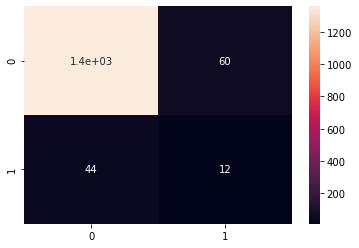

In [39]:
# Visualize a confusion matrix for the dt
cm2 = pd.DataFrame(confusion_matrix(y_test,dt_pre))
sns.heatmap(cm2, annot = True)
plt.show()

When using a decision tree classifier we had an accuracy of 93%. 49 individuals who had a stroke were classified as though they didn't and 61 individuals who did not have a stroke were classified as though they did. Again, this is a pretty good result for a 70/30 split.

## Conclusions
Overall this was a great data set to work with. It allowed use of classification algorithms, which came with surprisingly accurate results. The data had to be cleaned, encoded somewhat, and finally deployed into the classifiers. The classification algorithms may return slightly different results depending on how much we split the data into its training and test sets. Two other popular splits seem to be a 75/25 and an 80/20 split. 